# 1. Introduction

<b> Name: </b> Mohammad Javad Sharififar

<b> E-Mail: </b> Sharifi700@gmail.com

<b> Discription: </b> Thsi code is a model which trained on <i> final_books.xlsx </i> from <i> https://github.com/amiralimadadi/Regression_TheranHousing </i> . This notebook completely is written by myself, here we want to cluster persian books.

# 2. Set the Notebook

In [82]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
#import data
data_or = pd.read_excel('C:\\Users\\MJavad\\Downloads\\final_books.xlsx') #I coludnt import it directly because of an Error

In [84]:
data = data_or.copy() #we work on data to not lose original data in case of needings

# 3. Exploratory Data Analysis

In [85]:
data

,title,date,content,category,autor,comments
0,بهترین درسهای زندگی‎,۲ دی ۱۳۹۸,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ...,روانشناسی,سارا رزولت,بدون دیدگاه
1,از سلاجقه تا صفویه,۱ دی ۱۳۹۸,کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,تاریخ ایران,نصرت الله مشکوتی,بدون دیدگاه
2,سرگذشت رضاشاه,۲۹ آذر ۱۳۹۸,دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,تاریخ ایران,فتح الله بینا,بدون دیدگاه
3,سیری نوین در فرگشت و اسرار مغز,۲۸ آذر ۱۳۹۸,مجموعه پیش رو مطالبیست که در گروه Evolution ت...,علم و دانش,مانی منوچهری,بدون دیدگاه
4,آسمان پرستاره,۲۶ آذر ۱۳۹۸,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبان...,کودکان و نوجوانان,کتی هایدن,بدون دیدگاه
...,...,...,...,...,...,...
2819,آشنایی با علم رباتیک,۱۲ اردیبهشت ۱۳۸۸,NaN,رباتیک,شبنم عاقلی,۲۱ دیدگاه
2820,دانلود مجله الکترونیکی برنامه نویس – شماره اول,۱۱ اردیبهشت ۱۳۸۸,NaN,برنامه نویسی,Barnamenevis.org,۱۰ دیدگاه
2821,داستان خواستگاری یا انتخاب,۱۱ اردیبهشت ۱۳۸۸,کتابی که می خواهید مطالعه کنید به صورت فیلم ن...,داستان و رمان,م. مودب پور,۱۲ دیدگاه
2822,آشنایی با قطعات سخت افزاری کامپیوتر,۱۱ اردیبهشت ۱۳۸۸,NaN,سخت افزار,پارس بوک,۵۲ دیدگاه


Here we see that we have 6 Features, One of them is numeric (comments), one is date (date), 2 are categorical (category and autor) and 2 of them are text (title and content). so we should manipulate all these different types differently

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2824 non-null   object
 1   date      2824 non-null   object
 2   content   2441 non-null   object
 3   category  2824 non-null   object
 4   autor     2824 non-null   object
 5   comments  2824 non-null   object
dtypes: object(6)
memory usage: 132.5+ KB


As we see it says that we dont have some null values on content and we we should take care of them.
Also all dtypes are object, for different manipulations, we should chnage dtype also
First we go to handle numeric data:

To convert comments to number, we define a function which gives us number of comments as integer and apply it om comments column

In [87]:
def com_num(i):
    if i == "بدون دیدگاه":
        i = 0
    else:
        i = int(i.split(' ')[0])
    return i

In [88]:
data['comments'] = data['comments'].apply(lambda x : com_num(x))

Check if it is done truely:

In [89]:
data

,title,date,content,category,autor,comments
0,بهترین درسهای زندگی‎,۲ دی ۱۳۹۸,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ...,روانشناسی,سارا رزولت,0
1,از سلاجقه تا صفویه,۱ دی ۱۳۹۸,کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,تاریخ ایران,نصرت الله مشکوتی,0
2,سرگذشت رضاشاه,۲۹ آذر ۱۳۹۸,دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,تاریخ ایران,فتح الله بینا,0
3,سیری نوین در فرگشت و اسرار مغز,۲۸ آذر ۱۳۹۸,مجموعه پیش رو مطالبیست که در گروه Evolution ت...,علم و دانش,مانی منوچهری,0
4,آسمان پرستاره,۲۶ آذر ۱۳۹۸,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبان...,کودکان و نوجوانان,کتی هایدن,0
...,...,...,...,...,...,...
2819,آشنایی با علم رباتیک,۱۲ اردیبهشت ۱۳۸۸,NaN,رباتیک,شبنم عاقلی,21
2820,دانلود مجله الکترونیکی برنامه نویس – شماره اول,۱۱ اردیبهشت ۱۳۸۸,NaN,برنامه نویسی,Barnamenevis.org,10
2821,داستان خواستگاری یا انتخاب,۱۱ اردیبهشت ۱۳۸۸,کتابی که می خواهید مطالعه کنید به صورت فیلم ن...,داستان و رمان,م. مودب پور,12
2822,آشنایی با قطعات سخت افزاری کامپیوتر,۱۱ اردیبهشت ۱۳۸۸,NaN,سخت افزار,پارس بوک,52


Then we go for date column. we cant use date in this format, so instead we use days from putting book on the website till now:

In [90]:
#Dictionary to convert month name to month number:
mounth_dict = {'فروردین':1,'اردیبهشت':2,'خرداد':3,'تیر':4,'مرداد':5,'شهریور':6,'مهر':7,'آبان':8,'آذر':9,'دی':10,'بهمن':11,'اسفند':12}

In [91]:
#This function let us have the days from putting on website to nowL
import jdatetime
from datetime import date
def impute_date(text):
    a = text.strip()
    a = a.split(' ')
    a.reverse()
    a[0] = int(a[0])
    a[1] = mounth_dict[a[1]]
    a[2] = int(a[2])
    gregorian_date = jdatetime.date(a[0],a[1],a[2]).togregorian() #we used jdatetime library to convert Persian date to Georgian
    today = date.today()
    return (today - gregorian_date).days

In [92]:
data.date = data.date.apply(lambda x: impute_date(x))

and we check if it is done right:

In [93]:
data

,title,date,content,category,autor,comments
0,بهترین درسهای زندگی‎,969,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ...,روانشناسی,سارا رزولت,0
1,از سلاجقه تا صفویه,970,کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,تاریخ ایران,نصرت الله مشکوتی,0
2,سرگذشت رضاشاه,972,دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,تاریخ ایران,فتح الله بینا,0
3,سیری نوین در فرگشت و اسرار مغز,973,مجموعه پیش رو مطالبیست که در گروه Evolution ت...,علم و دانش,مانی منوچهری,0
4,آسمان پرستاره,975,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبان...,کودکان و نوجوانان,کتی هایدن,0
...,...,...,...,...,...,...
2819,آشنایی با علم رباتیک,4856,NaN,رباتیک,شبنم عاقلی,21
2820,دانلود مجله الکترونیکی برنامه نویس – شماره اول,4857,NaN,برنامه نویسی,Barnamenevis.org,10
2821,داستان خواستگاری یا انتخاب,4857,کتابی که می خواهید مطالعه کنید به صورت فیلم ن...,داستان و رمان,م. مودب پور,12
2822,آشنایی با قطعات سخت افزاری کامپیوتر,4857,NaN,سخت افزار,پارس بوک,52


Now we have 2 numeric data, lets have a look on them:

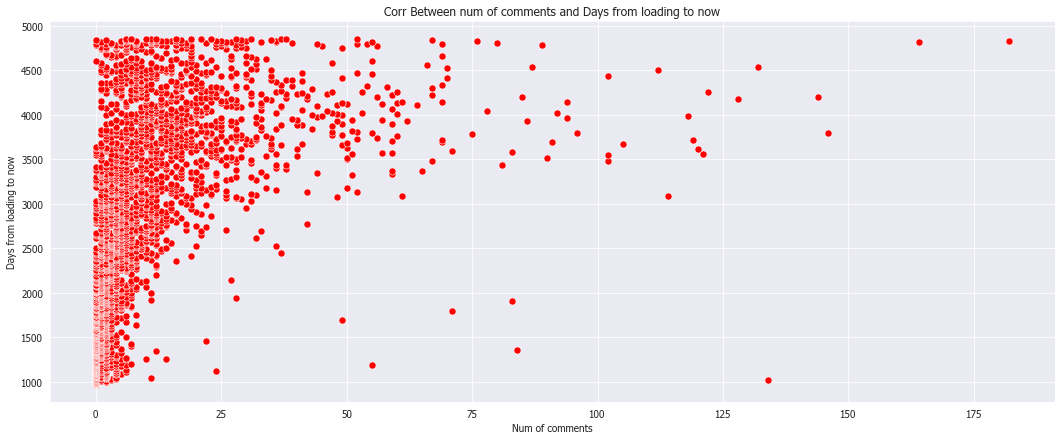

Correlaton between these 2 variables : 0.451


In [94]:
plt.figure(figsize= (18,7))

sns.scatterplot(x = "comments", y = "date", data = data, s = 50, c = ['red'])
plt.xlabel('Num of comments');
plt.ylabel('Days from loading to now');
plt.title('Corr Between num of comments and Days from loading to now')
plt.show()

print('Correlaton between these 2 variables : {:.3f}'.format(data['comments'].corr(data['date'])))

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


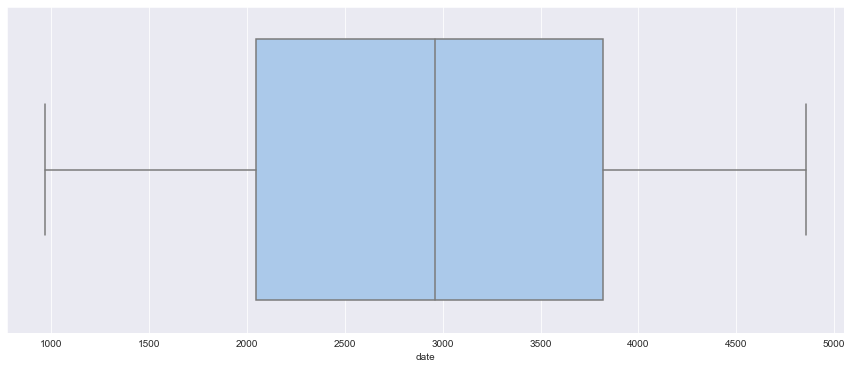

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


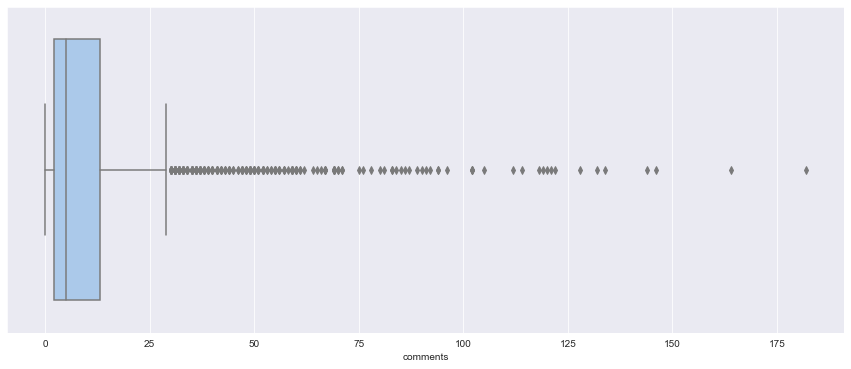

In [95]:
num_data = ['date','comments']

sns.set_style("darkgrid")
sns.set_palette("pastel")

for i in num_data:
    plt.figure(figsize = (15,6))
    sns.boxplot(data[i])
    plt.show()

As we see here, we dont have any outlier in date column, but we have many of them in comments. in clustering algorithmes like K-Means, because we use distance its important to scale features and remove outliers subsequently. but in algotithemes like DBSCAN we cant ignore them. here we remove outliers to make distance-based models usable for our problem

In [96]:
for i in num_data:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQ = Q3-Q1
    data[i] = np.where(np.logical_or(data[i]>(Q3 + 1.5*IQ) ,data[i]< (Q1 - 1.5*IQ)) ,np.nan, data[i]) #change them to NaN

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


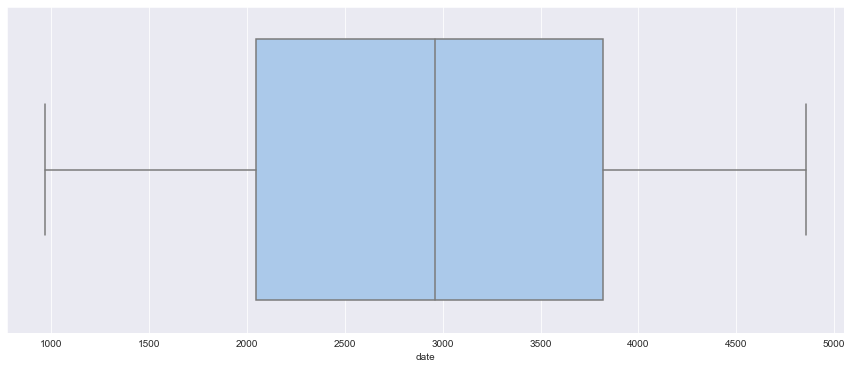

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


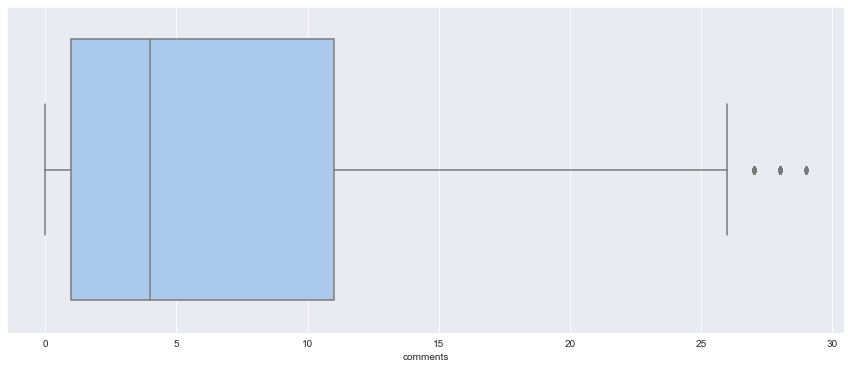

In [97]:
for i in num_data:
    plt.figure(figsize = (15,6))
    sns.boxplot(data[i])
    plt.show()

lets check the scatter plot nd correlation after outlier removal:

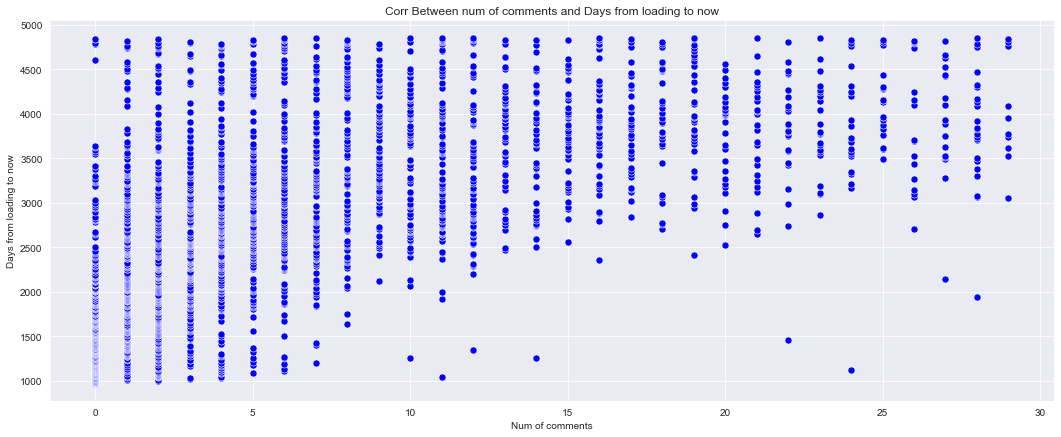

Correlaton between these 2 variables : 0.601


In [98]:
plt.figure(figsize= (18,7))

sns.scatterplot(x = "comments", y = "date", data = data, s = 50, c = ['blue'])
plt.xlabel('Num of comments');
plt.ylabel('Days from loading to now');
plt.title('Corr Between num of comments and Days from loading to now')
plt.show()

print('Correlaton between these 2 variables : {:.3f}'.format(data['comments'].corr(data['date'])))

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     2824 non-null   object 
 1   date      2824 non-null   float64
 2   content   2441 non-null   object 
 3   category  2824 non-null   object 
 4   autor     2824 non-null   object 
 5   comments  2584 non-null   float64
dtypes: float64(2), object(4)
memory usage: 132.5+ KB


We see that Sctter plot is more significant and correaltion has a huge increase, but we lost some how 250 values in commentt columns that we impute them later.
So know we dont have any outlier in our dataset. now lets go for categorical variables

We have a look on unique values of each categorical variable, count of the most and the least frequent of unique variables and len of unique variables:

In [100]:
cat_data = ["category",'autor']
for i in cat_data:
    data[i] = data[i].str.strip()
    print(i.upper(),':')
    print(sorted(data[i].unique()),"\n")
    print(data.groupby(i)[i].count().sort_values(),'\n')
    print('Num of unique values:',len(data[i].unique()),'\n')

CATEGORY :
['آشپزی و شیرینی پزی', 'آفیس', 'آموزش زبان', 'آموزش نرم افزار', 'آموزشهای متفرقه', 'ادبیات', 'اقتصاد', 'ایران', 'اینترنت و وب', 'بازی های کامپیوتری', 'برنامه نویسی', 'تاریخ ایران', 'تاریخ جهان', 'جامعه شناسی', 'جغرافیا و گردشگری', 'حقوق و قضایی', 'حیوانات', 'خارج از ایران', 'خانه و خانواده', 'خودرو', 'داستان و رمان', 'درسی و دانشگاهی', 'دسته\u200cبندی نشده', 'دینی و مذهبی', 'رباتیک', 'روانشناسی', 'زندگینامه', 'سخت افزار', 'سیاسی', 'سیستم عامل', 'سینما', 'شبکه کامپیوتری', 'شعر و غزل', 'طراحی وب سایت', 'طنز و سرگرمی', 'علم و دانش', 'علوم ماورا طبیعی', 'علوم مهندسی', 'عکس و تصویر', 'فلسفه', 'فن آوری اطلاعات', 'محیط زیست', 'مطالعه و کتابخوانی', 'مقالات علمی', 'مهارت و ترفند', 'موسیقی', 'میکس و مونتاژ', 'نجوم و ستاره شناسی', 'نرم افزارهای طراحی', 'هنر و خلاقیت', 'هک و امنیت', 'ورزش', 'پزشکی و سلامت', 'کاربردی', 'کشاورزی', 'کودکان و نوجوانان'] 

category
میکس و مونتاژ           1
محیط زیست               4
کاربردی                 4
عکس و تصویر             6
نرم افزارهای طراحی      

As we see above, In Category columns we have some values with low frequensies, so we merge them with the group name 'دسته‌بندی نشده' to reduce unique variables

In [101]:
data['category'] = np.where(np.logical_or(data['category']=='میکس و مونتاژ',data['category']=='محیط زیست'),'دسته‌بندی نشده',data['category'])
data['category'] = np.where(np.logical_or(data['category']=='کاربردی',data['category']=='عکس و تصویر'),'دسته‌بندی نشده',data['category'])

But for Autor variable thing are harder. First of all, we have much many incorrect data, texts are not nirmolized, in some case we see book title instead of autor and we have same autors which has written differently and they should be merged:

In [102]:
#First we change object type to string before modifying
data['autor'] = data['autor'].astype('str')

#Using Parsivar library, we normalize the texts
from parsivar import Normalizer
def persian_normalizer(text):
    normal = Normalizer().normalize(text)
    return normal
data['autor']= data['autor'].apply(lambda x: persian_normalizer(x))

#Then we convert any title book or another incorretct data to NaN
data['autor'] = np.where(np.logical_or(data['autor']=='',data['autor']=='-',data['autor']=='آشنایی با قانون فقه'),
                         np.nan,data['autor'])
data['autor'] = np.where(np.logical_or(data['autor']=='آشنایی با نانچیکو',data['autor']=='آموزش ساخت ربات ساده',
                                       data['autor']=='آموزش مقدماتی اتوکد 2011'),np.nan,data['autor'])
data['autor'] = np.where(np.logical_or(data['autor']=='آموزش نرم افزار پریمیر',data['autor']=='حقوق بازرگانی و داد و ستد',
                                       data['autor']=='رسم الخط عثمان طه'),np.nan,data['autor'])
data['autor'] = np.where(np.logical_or(data['autor']=='روش تربیت کودک',data['autor']== 'قانون اساسی جمهوری اسلامی ایران',
                                      data['autor']=='لینک دانلود حذف شده است'),np.nan,data['autor'])
data['autor'] = np.where(np.logical_or(data['autor']=='مجموعه کاریکاتورهای مترو',data['autor']=='ناشناس',data['autor']=='نامشخص'),
                         np.nan,data['autor'])
data['autor'] = np.where(np.logical_or(data['autor']=='نویسندگان مختلف',data['autor']=='نکته های کوچک زندگی',data['autor']=='گروه نویسندگان')
                         ,np.nan,data['autor'])
data['autor'] = np.where(data['autor']=='آشنایی با قانون فقه',np.nan,data['autor'])
data['autor'] = np.where(data['autor']=='آموزش مقدماتی اتوکد 2011',np.nan,data['autor'])
data['autor'] = np.where(data['autor']=='آموزش نرم\u200cافزار پریمیر',np.nan,data['autor'])
data['autor'] = np.where(data['autor']=='رسم الخط عثمان طه',np.nan,data['autor'])
data['autor'] = np.where(data['autor']=='لینک دانلود حذف\u200cشده\u200cاست',np.nan,data['autor'])
data['autor'] = np.where(data['autor']=='نامشخص',np.nan,data['autor'])
data['autor'] = np.where(data['autor']=='نکته\u200cهای کوچک زندگی',np.nan,data['autor'])
data['autor'] = np.where(data['autor']=='گروه نویسندگان',np.nan,data['autor'])

#Here we merge all same autors with different dectation and handwriting:
data['autor'] = np.where(data['autor']=='پارس بوک',':پارس بوک',data['autor'])
data['autor'] = np.where(data['autor']=='آرتور سی کلارک','آرتور سی. کلارک',data['autor'])
data['autor'] = np.where(data['autor']=='آلبر کامو','آلبرکامو',data['autor'])
data['autor'] = np.where(np.logical_or(data['autor']=='آموزش و پرورش',data['autor']== 'آموزش و پرورش وقت',
                                       data['autor'] =='وزارت آموزش و پرورش وقت'),'وزارت آموزش و پرورش',data['autor'])
data['autor'] = np.where(data['autor']=='آگاتا کریستی','آگاتاکریستی',data['autor'])
data['autor'] = np.where(data['autor']=='آیزاک آسیموف','آیزاک آسیموف',data['autor'])
data['autor'] = np.where(data['autor']=='ابراهیم صفائی','ابراهیم صفایی',data['autor'])
data['autor'] = np.where(data['autor']=='اریک فون دنیکن','اریک فون دانیکن',data['autor'])
data['autor'] = np.where(data['autor']=='استفنی میر','استفانی مه یر',data['autor'])
data['autor'] = np.where(data['autor']=='اصغر طاهرزاده','اصغر طاهر زاده',data['autor'])
data['autor'] = np.where(data['autor']=='امیرحسین خنجی','امیر حسین خنجی',data['autor'])
data['autor'] = np.where(data['autor']=='امیرحسین شریفی','امیر حسین شریفی',data['autor'])
data['autor'] = np.where(data['autor']=='اوریانا فالاچی','اوریانا فالاچی',data['autor'])
data['autor'] = np.where(data['autor']=='ایران خودرو','ایرانخودرو',data['autor'])
data['autor'] = np.where(data['autor']=='باربارا دی آنجلیس','باربارا دی انجلیس',data['autor'])
data['autor'] = np.where(data['autor']=='برایان تریسی','برایان تریسی و کریستینا تریسی',data['autor'])
data['autor'] = np.where(data['autor']=='بهاءالدین خرمشاهی','بهاالدین خرمشاهی',data['autor'])
data['autor'] = np.where(data['autor']=='جورج اورول','جرج اورول',data['autor'])
data['autor'] = np.where(data['autor']=='جی. کی. رولینگ','ج.ک. رولینگ',data['autor'])
data['autor'] = np.where(data['autor']=='حسن انوری','حسن صدر حاج سید جوادی, حسن انوری',data['autor'])
data['autor'] = np.where(data['autor']=='حافظ','خواجه حافظ شیرازی',data['autor'])
data['autor'] = np.where(data['autor']=='دزموند موریس','دسموند موریس',data['autor'])
data['autor'] = np.where(data['autor']=='دفتر مطالعات سیاسی و بین الملل','دفتر مطالعات سیاسی و بین الملل ایران',data['autor'])
data['autor'] = np.where(data['autor']=='دکتر دوید جنکیز','دکتر دیوید آر هاوکینز',data['autor'])
data['autor'] = np.where(data['autor']=='دکتر فرشاد اکبرنژاد','دکتر فرشاد اکبرنژاد ( مترجم )',data['autor'])
data['autor'] = np.where(data['autor']=='دیل کارنگی','دیل کارنگی،جیمز آلن و الا وایلر',data['autor'])
data['autor'] = np.where(data['autor']=='راشين گوهرشاهي','راشین گوهرشاهی',data['autor'])
data['autor'] = np.where(data['autor']=='رضا کثیرلو','رضا كثيرلو',data['autor'])
data['autor'] = np.where(data['autor']=='سازمان ملل متحد','سازمان ملل',data['autor'])
data['autor'] = np.where(np.logical_or(data['autor']=='سازمان پژوهش و برنامه ريزی آموزشی'
                                       ,data['autor']=='سازمان پژوهش و برنامه ريزي آموزشي',
                                       data['autor']== 'سازمان پژوهش و برنامه ریزی آموزش'),'سازمان پژوهش و برنامه ریزی آموزشی',data['autor'])
data['autor'] = np.where(data['autor']=='سر آرتور کانن دویل','سر آرتور کان دویل',data['autor'])
data['autor'] = np.where(data['autor']=='سید حسن ابطحی','سید حسن ابطهی',data['autor'])
data['autor'] = np.where(data['autor']=='سید مصطفی توفیق','سید مصطفیرضا توفیق',data['autor'])
data['autor'] = np.where(data['autor']=='صادق خیر اللهی','صادق خیراللهی',data['autor'])
data['autor'] = np.where(data['autor']=='صادق زیباکلام','صادق زیباکلام',data['autor'])
data['autor'] = np.where(data['autor']=='صمد بهرنگی','صمد بهرنگی و بهروز تبریزی',data['autor'])
data['autor'] = np.where(data['autor']=='ع.سجادی','ع سجادی',data['autor'])
data['autor'] = np.where(data['autor']=='دکتر علی شریعتی','علی شریعتی',data['autor'])
data['autor'] = np.where(data['autor']=='فرشید باباجانی','فرشید باباجانی و خانم جلوداریان',data['autor'])
data['autor'] = np.where(data['autor']=='فرشید شیرافکن','فرشید شیر افکن',data['autor'])
data['autor'] = np.where(data['autor']=='فروغ فرخزاد','فروغ فرخ زاد',data['autor'])
data['autor'] = np.where(np.logical_or(data['autor']=='مؤسسة ژئوفیزیک دانشگاه تهران',data['autor'] == 'مؤسسة ژئوفيزيک دانشگاه تهران'),
                         'موسسه ژئوفیزیک دانشگاه تهران',data['autor'])
data['autor'] = np.where(data['autor']=='محمد رضائی','محمد رضایی روشن',data['autor'])
data['autor'] = np.where(data['autor']=='محمد سلطانی','محمد سلطانی رنانی',data['autor'])
data['autor'] = np.where(data['autor']=='محمدعلی جمالزاده','محمدعلی جمال زاده',data['autor'])
data['autor'] = np.where(data['autor']=='محمدفر','محمد فر',data['autor'])
data['autor'] = np.where(data['autor']=='مصطفی پورنور علی','مصطفی پورنورعلی',data['autor'])
data['autor'] = np.where(data['autor']=='مهدی بشیری','مهدی بشیری کبریا',data['autor'])
data['autor'] = np.where(data['autor']=='نوام چامسکی','نوآم چامسکی',data['autor'])
data['autor'] = np.where(np.logical_or(data['autor']=='آیت الله مکارم شیرازی',data['autor']=='ترجمه آیت الله مکارم شیرازی'),'ناصر مکارم شیرازی',
                         data['autor'])
data['autor'] = np.where(data['autor']=='ناصرالدین شاه قاجار','ناصرالدین شاه',data['autor'])
data['autor'] = np.where(data['autor']=='نیل دونالدواش','نیل دونالدوالش',data['autor'])
data['autor'] = np.where(data['autor']=='هارولد لمپ','هارولد کلمپ',data['autor'])
data['autor'] = np.where(data['autor']=='هاشم رضى','هاشم رضی',data['autor'])
data['autor'] = np.where(data['autor']=='هانس کریستین آندرسن','هانس کریستیان آندرسن',data['autor'])
data['autor'] = np.where(np.logical_or(data['autor']=='وزارت فرهنگ وقت',data['autor'] == 'وزارت معارف قاجار'),'وزارت فرهنگ سابق',
                         data['autor'])
data['autor'] = np.where(data['autor']=='پایگاه اینترنتی پرستو','پایگاه پرستو',data['autor'])

data['autor'] = np.where(data['autor']==': پارس بوک','پارس بوک',data['autor'])
data['autor'] = np.where(data['autor']=='وزارت آموزش و پرورش وقت','وزارت آموزش و پرورش',data['autor'])
data['autor'] = np.where(data['autor']=='آگاتا کریستی\u200c','آگاتاکریستی',data['autor'])
data['autor'] = np.where(data['autor']=='آیزاک آسیموف','ایزاک آسیموف',data['autor'])
data['autor'] = np.where(data['autor']=='بهائالدین خرمشاهی','بهاالدین خرمشاهی',data['autor'])
data['autor'] = np.where(np.logical_or(data['autor']=='جوآن کتلین رولینگ',data['autor']=='ج . ک . رولینگ'),'جی . کی . رولینگ',data['autor'])
data['autor'] = np.where(data['autor']=='دفتر مطالعات سیاسی و بین\u200cالملل','دفتر مطالعات سیاسی و بین\u200cالملل ایران',data['autor'])
data['autor'] = np.where(data['autor']== 'سازمان پژوهش و برنامه\u200cریزی آموزش','سازمان پژوهش و برنامه\u200cریزی آموزشی',data['autor'])
data['autor'] = np.where(data['autor']=='صادق زیباکلام ، فرشته\u200cالسادات اتفاق\u200cفر','صادق زیباکلام',data['autor'])
data['autor'] = np.where(np.logical_or(data['autor']=='ع . سجادی',data['autor']=='ع سجادی'),'علی سجادی',data['autor'])
data['autor'] = np.where(np.logical_or(data['autor']=='آیت\u200cالله مکارم شیرازی',data['autor']=='ترجمه آیت\u200cالله مکارم شیرازی'),'ناصر مکارم شیرازی',data['autor'])


Lets see if the mission completed!

In [103]:
data['autor'] = data['autor'].astype('str') #we do this to dont get error because of comparing NaN and Str
for i in cat_data:
    data[i] = data[i].str.strip()
    print(i.upper(),':')
    print(sorted(data[i].unique()),"\n")
    print(data.groupby(i)[i].count().sort_values(),'\n')
    print('Num of unique values:',len(data[i].unique()),'\n')

CATEGORY :
['آشپزی و شیرینی پزی', 'آفیس', 'آموزش زبان', 'آموزش نرم افزار', 'آموزشهای متفرقه', 'ادبیات', 'اقتصاد', 'ایران', 'اینترنت و وب', 'بازی های کامپیوتری', 'برنامه نویسی', 'تاریخ ایران', 'تاریخ جهان', 'جامعه شناسی', 'جغرافیا و گردشگری', 'حقوق و قضایی', 'حیوانات', 'خارج از ایران', 'خانه و خانواده', 'خودرو', 'داستان و رمان', 'درسی و دانشگاهی', 'دسته\u200cبندی نشده', 'دینی و مذهبی', 'رباتیک', 'روانشناسی', 'زندگینامه', 'سخت افزار', 'سیاسی', 'سیستم عامل', 'سینما', 'شبکه کامپیوتری', 'شعر و غزل', 'طراحی وب سایت', 'طنز و سرگرمی', 'علم و دانش', 'علوم ماورا طبیعی', 'علوم مهندسی', 'فلسفه', 'فن آوری اطلاعات', 'مطالعه و کتابخوانی', 'مقالات علمی', 'مهارت و ترفند', 'موسیقی', 'نجوم و ستاره شناسی', 'نرم افزارهای طراحی', 'هنر و خلاقیت', 'هک و امنیت', 'ورزش', 'پزشکی و سلامت', 'کشاورزی', 'کودکان و نوجوانان'] 

category
نرم افزارهای طراحی      9
بازی های کامپیوتری      9
مهارت و ترفند          10
خارج از ایران          11
مطالعه و کتابخوانی     11
علم و دانش             11
مقالات علمی            12
سی

In [104]:
data['autor'] = np.where(data['autor']=='nan',np.nan,data['autor']) #Ther we convert 'nan' to NaN

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     2824 non-null   object 
 1   date      2824 non-null   float64
 2   content   2441 non-null   object 
 3   category  2824 non-null   object 
 4   autor     2628 non-null   object 
 5   comments  2584 non-null   float64
dtypes: float64(2), object(4)
memory usage: 132.5+ KB


So now we see that incorrect data are handled. lets have a look on the frequencies of autor variable:

In [106]:
a = pd.DataFrame(data.groupby('autor')['autor'].count().sort_values(ascending = False))
a.rename(columns = {'autor':'Frequency'},inplace = True)
a.reset_index(inplace = True)

And Here is the barchart:

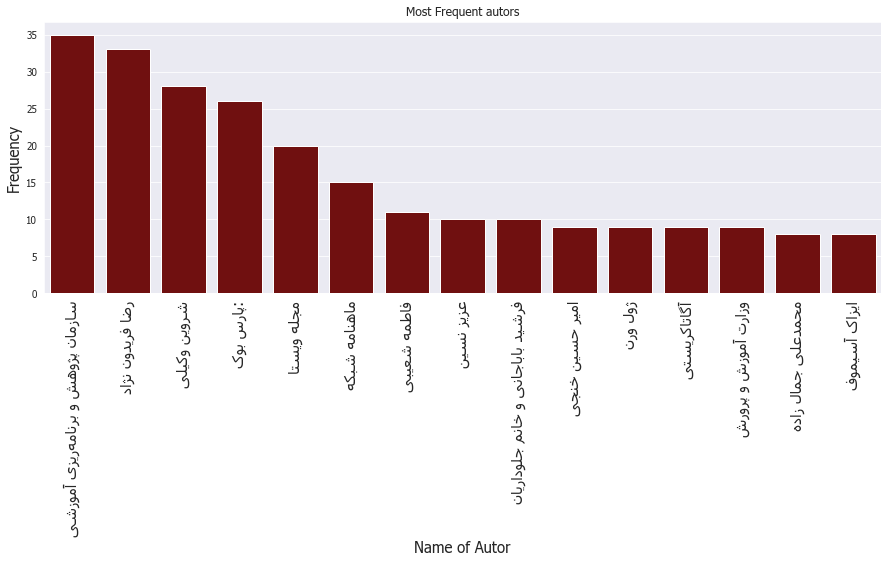

In [107]:
# To show the labls truely, we use these modules:
from bidi.algorithm import get_display
from arabic_reshaper import reshape
plt.rcParams['font.sans-serif'] = ['Tahoma']


fig = plt.figure(figsize = (15, 5))
sns.barplot(data = a.head(15), x = [get_display(reshape(label)) for label in a.head(15)['autor']],y = a.head(15)['Frequency'].ravel(),
            color ='maroon')
plt.xticks(rotation='vertical', size = 15)
plt.title('Most Frequent autors')
plt.xlabel('Name of Autor',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show()

Now lets see if we can merge autors with low frequency...

Below Series shows the Frequency of Frequency, for example we have 1643 autor that have just 1 frequency..

In [108]:
a.groupby('Frequency')['Frequency'].count()

Frequency
1     1649
2      181
3       52
4       17
5       15
6        8
7        2
8        4
9        4
10       2
11       1
15       1
20       1
26       1
28       1
33       1
35       1
Name: Frequency, dtype: int64

So its obvious we cant merge low frequency autors since we lost much data

Now we go for text variables (Content and Title), Lets see many unique values each has: 

In [109]:
data['title'] = data['title'].str.strip()
data['content'] = data['content'].str.strip()
print('Num of unique values in title:',len(data['title'].unique()),'\n')
print('Num of unique values in content:',len(data['content'].unique()),'\n')

Num of unique values in title: 2822 

Num of unique values in content: 2408 



In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     2824 non-null   object 
 1   date      2824 non-null   float64
 2   content   2441 non-null   object 
 3   category  2824 non-null   object 
 4   autor     2628 non-null   object 
 5   comments  2584 non-null   float64
dtypes: float64(2), object(4)
memory usage: 132.5+ KB


As we see, Almost all of values in these varibales are unique (we can understand it from non-null values of each variable is shown below.) But we have some non_unique values. lets see what they are.

In [111]:
temp = pd.DataFrame(data.groupby('title')['title'].count().sort_values(ascending = False)).head(10)

In [112]:
temp

,title
title,
وبلاگ نویسی شیرین با وردپرس,2
افسانه ها,2
صوتی روش کنترل ذهن,1
صوتی آیا قرن آمریکا به پایان رسیده است؟,1
صوتی ایران بین دو انقلاب,1
صوتی ایمان یا بی‌ایمانی,1
صوتی بلندی های بادگیر,1
صوتی بیشعوری,1
صوتی بیندیشید و ثروتمند شوید,1


We see that for title columns, we just have 2 duplicate values... we go to see what thay are:

In [113]:
data.loc[data['title']==list(temp.index)[0],:]

,title,date,content,category,autor,comments
6,وبلاگ نویسی شیرین با وردپرس,978.0,کتاب وبلاگ نویسی شیرین با WordPress به آموزش ی...,طراحی وب سایت,مایا,0.0
1834,وبلاگ نویسی شیرین با وردپرس,3480.0,این کتاب یکی از کاملترین کتابهای آموزشی و راهن...,اینترنت و وب,مایا,10.0


So افسانه‌ها is just a same name for 2 different books, so we dont have any problem with that

In [114]:
data.loc[data['title']==list(temp.index)[1],:]

,title,date,content,category,autor,comments
983,افسانه ها,2445.0,این کتاب قصه ها و افسانه هایی است که فضل الله ...,داستان و رمان,فضل الله مهتدی ( صبحی ),10.0
1599,افسانه ها,3185.0,طگوگول بنیان‌گذار سبک رئالیسم انتقادی در ادبیا...,داستان و رمان,نیکلای گوگول,0.0


But we have to same books with the name وبلاگ نویسی شیرین با وردپرس that one them entered to the website wrong. so we remove the newerbook and keep the old one.

In [115]:
data.drop(index = 6,inplace = True)

Now lets go what duplicates are in content:

In [116]:
temp = pd.DataFrame(data.groupby('content')['content'].count().sort_values(ascending = False)).head(10)

In [117]:
temp

,content
content,
,19
",",7
هزار و یک شب مجموعه‌ای از داستان‌های افسانه‌ای قدیمی عربی، ایرانی و هندی است که به زبان‌های متعددی منتشر شده‌است. اکثر ماجراهای آن در بغداد و ایران می‌گذرد و داستان‌های آن را از ریشهٔ ایرانی دانسته‌اند، که تحت تاثیر آثار هندی و عربی بوده‌است. اینکه داستان‌های هزار و یک شب مشخص و روشن باشند و تعداد آن‌ها دقیقا هزار و یک باشد چندان واقعی به نظر نمی‌رسد. اما داستان‌های زیادی زیر نام هزار و یک شب نوشته شده‌است.,5
اگر به دنبال کتابی هستید که به‌طور کامل نیاز شما را درزمینه‌ی واژگان زبان انگلیسی برآورده کند، کتاب «گلستان واژه‌های انگلیسی» را به شما پیشنهاد می‌کنیم. این مجموعه بر اساس کتاب «۴۰۰۰ واژه‌ی ضروری» تهیه و ترجمه‌شده است و متناسب با نیاز فارسی‌زبانان تکمیل‌تر نیز خواهد شد. علاوه بر کامل بودن، مزیت دیگر این مجموعه انسجام آن است، به‌طوری‌که برای یادگیری هر واژه نیازی نیست لغات دروس بعد را بدانید. اگر از جلد ۱ شروع به خواندن و یادگیری واژگان کنید، آهسته و پیوسته دایره‌ی واژگان خود را تقویت می‌کنید که این سبب می‌شود مهارت‌های گفتاری، شنیداری، نگارش و خواندن شما تقویت شود. یادتان باشد که در یادگیری زبان انگلیسی عجله نکنید، چراکه معمولاً سرعت زیاد در حفظ کردن لغات باعث می‌شود به همان سرعت نیز آن‌ها را فراموش کنید.,2
در فرایند آموزش این درس به اهمیت استفاده از حواس در شناسایی محیط اطراف پی می برند و با انجام فعالیت هایی با نقش حواس مختلف آشنا می شوند و مهارت مشاهده در آن ها تقویت می شود. هر جانور برای آن که زنده بماند و از عهده ی کارهایش بربیاید، باید بداند هر لحظه در جهان اطراف چه می گذرد. او بدون این اطلاعات نمی تواند غذا یا جفت پیدا کند، در زیستگاه مناسب بماند یا از جانوران شکارگر بگریزد. این اطلاعات حیاتی را حواس پنجگانه فراهم می کنند. این کتاب مربوط به دوره اول دبستان سال ۱۳۶۰ میباشد.,2
"این مجموعه که به علت گرانی کاغذ و هزینه های چاپ، به صورت کاغذی چاپ نشده و برای دانلود رایگان به صورت الکترونیکی منتشر شده است، شامل هشت جلد بود : آب وهوا؛ ماده و انرژی و ماشین های ساده؛ نور و صوت؛ گیاهان و جانوران؛ زمین و بوم شناسی؛ فضا؛ الکتریسته و مغناطیس. فهرست این کتاب عبارت است از:,",2
مرجع هر واقعیت علمی در زیر تصویر آن موجود می‌باشد. این کتاب به صورت دو زبانه‌ی انگلیسی و فارسی است که برای نوآموزان زبان انگلیسی نیز می‌تواند سودمند باشد. زمینه‌های علمی مطرح شده عبارتند از موضوعات پزشکی، مهندسی، اجتماعی، سیاسی، تاریخی، و … . با توجه به بهره‌گیری از تصاویر زیبا و جذاب، برای ارائه‌ی عمده‌ی مطالب مطرح شده در این کتاب، فهم و درک آن‌ها بسیار راحت و جذاب بوده و برای عموم مخاطبان با هر سطحی از تحصیلات، سودمند خواهد بود.,2
مطالعه ی چین کتابی است که در سال ۲۰۰۶ توسط تی.کالین، نوشته شده است و به بررسی رابطه ی بین مصرف فراورده های حیوانی و بیماریهایی نظیر سرطان پستان، پروستات، دیابت، بیماری قلبی، چاقی، بیماری دستگاه ایمنی، پوکی استخوان و از این دست می پردازد. این کتاب با بیش از ۵۰۰ هزار نسخه فروش از زمان چاپ تا سال ۲۰۱۱ یکی از مشهورترین کتاب های تغذیه در تاریخ آمریکا به شمار می رود. جلد اول این کتاب تحت عنوان «پروتئین حیوانی: تردید در جایگاه اسطوره‌ای آن» به زبان فارسی توسط نشر اینترنتی پاد منتشر شده ست.,2
", ,",2


We see that 3 of same contents are incorrect values and should be removed, but totally, lets have a look on all same contents and find out why they have occured!

In [118]:
data.loc[data['content']==list(temp.index)[0],:]

,title,date,content,category,autor,comments
2132,بازار های مالی بین الملل,3837.0,,اقتصاد,مرتضی علی یگانه,9.0
2379,اسرار رجیستری,4177.0,,سیستم عامل,جواد سلطانی,NaN
2387,آموزش برنامه نویسی ویندوز موبایل در .net compa...,4185.0,,برنامه نویسی,مهدی محبیان,10.0
2459,چگونه ترافیک سایت را افزایش دهیم؟,4286.0,,طراحی وب سایت,NaN,11.0
2579,مرجع فارسی CSS,4474.0,,طراحی وب سایت,احمد عادلی,15.0
2605,راهنمای خرید مادربرد,4506.0,,سخت افزار,NaN,13.0
2647,راهنمای بهینه سازی و افزایش سرعت ویندوز ۷,4587.0,,سیستم عامل,سعید سلامیان,NaN
2651,PDF بیماری طاعون را بشناسید,4604.0,,پزشکی و سلامت,دکتر حسین حاتمی,0.0
2656,PDF بهارستان طنز,4621.0,,طنز و سرگرمی,محمد حاجی حسینی,23.0
2686,PDF فراسوی ذهنم,4705.0,,داستان و رمان,ریچارد باخ,6.0


In [119]:
data.loc[data['content']==list(temp.index)[1],:]

,title,date,content,category,autor,comments
743,هلوکاست ، دروغ بزرگ یهودیان,2097.0,",",تاریخ جهان,حمیدرضا نیک بخش,7.0
2391,آموزش برنامه نویسی ویندوز موبایل,4191.0,",",برنامه نویسی,مهدی محبیان,8.0
2441,ساختار شبکه GSM,4262.0,",",شبکه کامپیوتری,NaN,16.0
2531,آموزش ساخت یک متن سه بعدی با فوتوشاپ,4389.0,",",آموزش نرم افزار,NaN,NaN
2654,PDF سرویس DNS,4613.0,",",شبکه کامپیوتری,NaN,7.0
2703,PDF آموزش و ترفندهای یاهو مسنجر,4750.0,",",آموزش نرم افزار,گروه نرم‌افزاری دانلود سافت,NaN
2733,PDF داستان کودکانه احمد و ساعت,4787.0,",",کودکان و نوجوانان,فرشته طائر پور,5.0


In [120]:
data.loc[data['content']==list(temp.index)[2],:]

,title,date,content,category,autor,comments
2057,قصه های هزار و یک شب – جلد ششم,3753.0,هزار و یک شب مجموعه‌ای از داستان‌های افسانه‌ای...,داستان و رمان,حمید عاملی,27.0
2062,قصه های هزار و یک شب – جلد پنجم,3758.0,هزار و یک شب مجموعه‌ای از داستان‌های افسانه‌ای...,داستان و رمان,حمید عاملی,19.0
2116,قصه های هزار و یک شب – جلد چهارم,3819.0,هزار و یک شب مجموعه‌ای از داستان‌های افسانه‌ای...,داستان و رمان,حمید عاملی,8.0
2141,قصه های هزار و یک شب – جلد سوم,3847.0,هزار و یک شب مجموعه‌ای از داستان‌های افسانه‌ای...,داستان و رمان,حمید عاملی,13.0
2166,قصه های هزار و یک شب – جلد دوم,3889.0,هزار و یک شب مجموعه‌ای از داستان‌های افسانه‌ای...,داستان و رمان,حمید عاملی,NaN


In [121]:
data.loc[data['content']==list(temp.index)[3],:]

,title,date,content,category,autor,comments
558,گلستان واژه های انگلیسی – جلد سوم,1848.0,اگر به دنبال کتابی هستید که به‌طور کامل نیاز ش...,آموزش زبان,معین فروردین,1.0
949,گلستان واژه های انگلیسی – جلد دوم,2402.0,اگر به دنبال کتابی هستید که به‌طور کامل نیاز ش...,آموزش زبان,معین فروردین,6.0


In [122]:
data.loc[data['content']==list(temp.index)[4],:]

,title,date,content,category,autor,comments
763,علوم تجربی دوم ابتدایی ۱۳۶۷,2132.0,در فرایند آموزش این درس به اهمیت استفاده از حو...,درسی و دانشگاهی,عطا الله بزرگ نیا,1.0
1372,علوم تجربی اول دبستان سال ۱۳۶۰,2913.0,در فرایند آموزش این درس به اهمیت استفاده از حو...,درسی و دانشگاهی,عطا الله بزرگ نیا,14.0


In [123]:
data.loc[data['content']==list(temp.index)[5],:]

,title,date,content,category,autor,comments
1222,بازی کنیم، بسازیم، بیاموزیم – گیاهان و جانوران,2728.0,این مجموعه که به علت گرانی کاغذ و هزینه های چا...,حیوانات,ماروین تالمن,5.0
1236,بازی کنیم، بسازیم، بیاموزیم – علوم زمین و فضا,2744.0,این مجموعه که به علت گرانی کاغذ و هزینه های چا...,نجوم و ستاره شناسی,ماروین تالمن,11.0


In [124]:
data.loc[data['content']==list(temp.index)[6],:]

,title,date,content,category,autor,comments
125,حقایق شگفت انگیز علمی – جلد دوم,1159.0,مرجع هر واقعیت علمی در زیر تصویر آن موجود می‌ب...,علم و دانش,احسان کوثری نیا,2.0
126,حقایق شگفت انگیز علمی – جلد اول,1160.0,مرجع هر واقعیت علمی در زیر تصویر آن موجود می‌ب...,علم و دانش,احسان کوثری نیا,2.0


In [125]:
data.loc[data['content']==list(temp.index)[7],:]

,title,date,content,category,autor,comments
1633,تردید در جایگاه اسطوره ای پروتئین حیوانی – جلد...,3225.0,مطالعه ی چین کتابی است که در سال ۲۰۰۶ توسط تی....,پزشکی و سلامت,ت . کالین کمبل و توماس کمبل,1.0
1730,تردید در جایگاه اسطوره ای پروتئین حیوانی – جلد...,3338.0,مطالعه ی چین کتابی است که در سال ۲۰۰۶ توسط تی....,پزشکی و سلامت,ت . کالین کمبل و توماس کمبل,4.0


In [126]:
data.loc[data['content']==list(temp.index)[8],:]

,title,date,content,category,autor,comments
2395,نگین آفرینش,4195.0,", ,",دینی و مذهبی,محمد بالا دستیان ، محمد مهدی حایری پور,9.0
2721,PDF احکام عمره مفرده,4779.0,", ,",دینی و مذهبی,آیت‌الله یوسف صانعی,4.0


As we see above, except 3 incorrect values, all other same contents are belongs to differnt issues of a same book. so we change all incorrect values with NaN

In [127]:
data.content = np.where(np.logical_or(data.content==list(temp.index)[0],data.content==list(temp.index)[1],
                                      data.content==list(temp.index)[8]),np.nan,data.content)

In [128]:
data['content'] = data['content'].astype('str')
data['title'] = data['title'].astype('str')
data.content = np.where(data.content == 'nan',np.nan,data.content)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2823
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     2823 non-null   object 
 1   date      2823 non-null   float64
 2   content   2414 non-null   object 
 3   category  2823 non-null   object 
 4   autor     2627 non-null   object 
 5   comments  2583 non-null   float64
dtypes: float64(2), object(4)
memory usage: 154.4+ KB


After all these steps, we go to Data preproccessing!

# 4. Preprocessing

## 4.1. Imputing Misssing Values 

For numerical data (comments) we want fill NaN values based on its category (not based on totall mean):

In [130]:
for i in list(data.category.unique()):
    data.loc[data.category.eq(i), 'comments'] = data.loc[data.category.eq(i), 'comments'].fillna(data.loc[data.category.eq(i), 'comments'].mean())

And we check if it done true:

In [131]:
data

,title,date,content,category,autor,comments
0,بهترین درسهای زندگی‎,969.0,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ا...,روانشناسی,سارا رزولت,0.000000
1,از سلاجقه تا صفویه,970.0,کتاب حاضر که اینک در دسترس خوانندگان محترم قرا...,تاریخ ایران,نصرت الله مشکوتی,0.000000
2,سرگذشت رضاشاه,972.0,دکتر فتح الله بینا تحصیلات خود را در رشته پزشک...,تاریخ ایران,فتح الله بینا,0.000000
3,سیری نوین در فرگشت و اسرار مغز,973.0,مجموعه پیش رو مطالبیست که در گروه Evolution تو...,علم و دانش,مانی منوچهری,0.000000
4,آسمان پرستاره,975.0,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبانی...,کودکان و نوجوانان,کتی هایدن,0.000000
...,...,...,...,...,...,...
2819,آشنایی با علم رباتیک,4856.0,NaN,رباتیک,شبنم عاقلی,21.000000
2820,دانلود مجله الکترونیکی برنامه نویس – شماره اول,4857.0,NaN,برنامه نویسی,Barnamenevis . org,10.000000
2821,داستان خواستگاری یا انتخاب,4857.0,کتابی که می خواهید مطالعه کنید به صورت فیلم نا...,داستان و رمان,م . مودب پور,12.000000
2822,آشنایی با قطعات سخت افزاری کامپیوتر,4857.0,NaN,سخت افزار,:پارس بوک,9.222222


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2823
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     2823 non-null   object 
 1   date      2823 non-null   float64
 2   content   2414 non-null   object 
 3   category  2823 non-null   object 
 4   autor     2627 non-null   object 
 5   comments  2823 non-null   float64
dtypes: float64(2), object(4)
memory usage: 154.4+ KB


For other null values, we remove them all, because it doesnt make sense to change them with mean or median for categorical and text data

In [133]:
data = data.dropna(axis = 0)

And now we have clean not null data!

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2821
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     2285 non-null   object 
 1   date      2285 non-null   float64
 2   content   2285 non-null   object 
 3   category  2285 non-null   object 
 4   autor     2285 non-null   object 
 5   comments  2285 non-null   float64
dtypes: float64(2), object(4)
memory usage: 125.0+ KB


## 4.2. Handling incorrect data

We have done this step already, when correcting incorrect data in autor and content column!
but here i want to check if there is any other incorrect data in title and content columns

For that we sort data based on length of title and content to see if we have any other incorrect data in these variables. So i define temprory columns for lenght of these varibles and based on them

In [135]:
data['content_len'] = data['content'].apply(lambda x: len(x))
data['title_len'] = data['title'].apply(lambda x: len(x))

C:\Users\MJavad\AppData\Local\Temp\ipykernel_3816\941381271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content_len'] = data['content'].apply(lambda x: len(x))
C:\Users\MJavad\AppData\Local\Temp\ipykernel_3816\941381271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title_len'] = data['title'].apply(lambda x: len(x))


In [136]:
data.sort_values(by=['content_len'], inplace = False).head(20)

,title,date,content,category,autor,comments,content_len,title_len
2721,PDF احکام عمره مفرده,4779.0,", ,",دینی و مذهبی,آیت‌الله یوسف صانعی,4.000000,3,21
2395,نگین آفرینش,4195.0,", ,",دینی و مذهبی,محمد بالا دستیان ، محمد مهدی حایری پور,9.000000,3,11
2367,آن زن یک روبات است,4158.0,داستانی کوتاه و خواندنی درباره یک روبات خانه د...,داستان و رمان,مجتبی ورشادی,1.000000,60,18
2495,۶ سیگما,4332.0,آنچه در مفهوم شش سیگما مستتر است را می توان در...,اقتصاد,کورش رحیمی,16.000000,67,7
2149,انقلاب علیه جرجیو و شکوفه,3861.0,موضوع کتاب یک داستان کوتاه عاشقانه است که به ز...,داستان و رمان,ی . ب,9.000000,71,25
2160,جایی در بهشت برای من نیست,3880.0,"من زاده بهشتم…..,دست سرنوشت است که به ناکجا می...",شعر و غزل,شهرزاد مشیری,22.000000,95,25
1713,آیا میدانستید؟,3317.0,این کتاب شامل صدها آیا میدانستید علمی و جذاب ...,طنز و سرگرمی,الیاس خضری,9.083333,100,14
2103,دانلود تقویم سال ۱۳۹۱,3804.0,تقویم سال ۱۳۹۱ خورشیدی به همراه ماههای قمری و ...,دسته‌بندی نشده,موسسه ژئوفیزیک دانشگاه تهران,3.951613,101,21
2359,پیامک ها و اس ام اس های طنز,4144.0,این کتاب مجموعه ای جالب از پیامک های طنز و جال...,طنز و سرگرمی,ایران اس‌ام اس پنل,9.083333,101,27
894,آموزش الفبای فارسی برای کودکان سال ۱۳۳۰,2326.0,این کتاب در سال ۱۳۳۰ شمسی به دست دکتر فتح الله...,درسی و دانشگاهی,دکتر فتح الله بنیا,2.000000,104,39


In [137]:
data.sort_values(by=['title_len'], inplace = False).head(20)

,title,date,content,category,autor,comments,content_len,title_len
1289,قول,2808.0,«قول» عنوان فرعی یی هم دارد با نام «فاتحه یی ب...,داستان و رمان,فریدریش دورنمات,0.0,1163,3
805,مسخ,2192.0,“مسخ” تنها رمان و مشهورترین اثر فرانتس کافکا ا...,داستان و رمان,فرانتس کافکا,2.0,1338,3
270,خواب,1381.0,خواب مسأله بسیار مهمی است که تمام افراد با هر ...,پزشکی و سلامت,مجله ویستا,0.0,1089,4
910,جلاد,2350.0,پار فابیان لاگرکویست یک شاعر، نمایش نامه نویس،...,داستان و رمان,پر لاگرکویست,0.0,316,4
74,سلول,1086.0,انسان از ابتدای خلقت تا کنون همیشه با مشکلاتی ...,فلسفه,احسان کیانی فرد,1.0,2874,4
388,یوگا,1570.0,ما انسان هستیم و به عنوان موجودات انسانی به صو...,ورزش,مجله ویستا,0.0,1029,4
997,معلول,2462.0,جامعه ما شناخت زیادی درباره معلولان ندارند و گ...,جامعه شناسی,وحید نجفی,1.0,668,5
955,هورلا,2409.0,«هورلا» مجموعه‌ای از دوموپاسان نویسنده‌ی قرن ن...,داستان و رمان,گی دو موپاسان,6.0,613,5
1579,طهران,3163.0,بهشت زهرا ۴۳ ساله شد – نگاهی به تاریخچه میدان ...,ایران,امیر قربانی,11.0,1301,5
1262,گرداب,2776.0,میخائیل شولوخوف به سال ۱۹۰۵ در روستای کروجلنین...,داستان و رمان,میخائیل شولوخف,1.0,881,5


Because there is not any other incorrect data, we go for next step

In [138]:
data.drop(['content_len','title_len'],inplace = True,axis = 1)

C:\Users\MJavad\AppData\Local\Temp\ipykernel_3816\1708140556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['content_len','title_len'],inplace = True,axis = 1)


## 4.3. Imputing Outliers

We have done already for our 2 numerical variables!

## 4.4. Rempving Duplicate Values

In [139]:
data = data.drop_duplicates()

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2821
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     2285 non-null   object 
 1   date      2285 non-null   float64
 2   content   2285 non-null   object 
 3   category  2285 non-null   object 
 4   autor     2285 non-null   object 
 5   comments  2285 non-null   float64
dtypes: float64(2), object(4)
memory usage: 125.0+ KB


There is not any duplicate value!

## 4.5. Handling Categorical Data

We have to perform One Hot on each categorical variable

In [243]:
category = pd.get_dummies(data['category'])
category.reset_index(inplace = True,drop = True)

In [244]:
category

,آشپزی و شیرینی پزی,آفیس,آموزش زبان,آموزش نرم افزار,آموزشهای متفرقه,ادبیات,اقتصاد,ایران,اینترنت و وب,بازی های کامپیوتری,...,مهارت و ترفند,موسیقی,نجوم و ستاره شناسی,نرم افزارهای طراحی,هنر و خلاقیت,هک و امنیت,ورزش,پزشکی و سلامت,کشاورزی,کودکان و نوجوانان
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For autor, we have to do sth else before. As I mentioned above, we have many autors with low frequencies and if I perform One-Hot on theam, i will have many columns whith very little information. so I merge all these low frequensies in an new value and then remove that value after One-Hot.

Below you can see frequency of values in autor:

In [142]:
a = pd.DataFrame(data.groupby('autor')['autor'].count().sort_values(ascending = False))
a.rename(columns = {'autor':'Frequency'},inplace = True)
a.reset_index(inplace = True)

In [143]:
a

,autor,Frequency
0,سازمان پژوهش و برنامه‌ریزی آموزشی,35
1,رضا فریدون نژاد,33
2,شروین وکیلی,28
3,مجله ویستا,20
4,ماهنامه شبکه,15
...,...,...
1690,رودکی,1
1691,روح الله پیش بهار,1
1692,روح الله فلاح,1
1693,روح الله خالقی,1


We have 1443 autor with 1 frequency..

In [144]:
a.groupby('Frequency')['Frequency'].count()

Frequency
1     1450
2      148
3       42
4       19
5       12
6        7
7        2
8        4
9        3
10       2
11       1
15       1
20       1
28       1
33       1
35       1
Name: Frequency, dtype: int64

Below, I merged all autors with frequency<3 in an سایر value

In [145]:
b = a.loc[a.Frequency<3,:]

In [146]:
data

,title,date,content,category,autor,comments
0,بهترین درسهای زندگی‎,969.0,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ا...,روانشناسی,سارا رزولت,0.000000
1,از سلاجقه تا صفویه,970.0,کتاب حاضر که اینک در دسترس خوانندگان محترم قرا...,تاریخ ایران,نصرت الله مشکوتی,0.000000
2,سرگذشت رضاشاه,972.0,دکتر فتح الله بینا تحصیلات خود را در رشته پزشک...,تاریخ ایران,فتح الله بینا,0.000000
3,سیری نوین در فرگشت و اسرار مغز,973.0,مجموعه پیش رو مطالبیست که در گروه Evolution تو...,علم و دانش,مانی منوچهری,0.000000
4,آسمان پرستاره,975.0,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبانی...,کودکان و نوجوانان,کتی هایدن,0.000000
...,...,...,...,...,...,...
2787,PDF برنامه غذایی کودکان و نوزادان از ۶ ماهگی ...,4832.0,"این کتاب شامل بخشهای زیر است :,۱- اصول تغذیه ...",کودکان و نوجوانان,دکتر حسین آشوری,15.000000
2793,صدا در کامپیوتر – پروژه درس محیط های چند رسانه...,4835.0,این پروژه مربوط به درس محیطهای چند رسانه ایی ا...,مقالات علمی,محدثه طاهری,13.000000
2794,PDF کیمیای محبت اثر محمد ری شهری,4836.0,رجبعلی نکوگویان مشهور به جناب شیخ و شیخ رجبعلی...,دینی و مذهبی,محمد ری شهری,6.895349
2796,PDF مجموعه خلاصه ۱۹ رمان فارسی,4838.0,این کتاب، متن ۱۹ رمان زیبای فارسی را به صورت خ...,داستان و رمان,:پارس بوک,29.000000


In [147]:
data_f = data
data_f['autor'] = data['autor'].replace(list(b['autor']),'سایر')

In [148]:
data_f

,title,date,content,category,autor,comments
0,بهترین درسهای زندگی‎,969.0,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ا...,روانشناسی,سایر,0.000000
1,از سلاجقه تا صفویه,970.0,کتاب حاضر که اینک در دسترس خوانندگان محترم قرا...,تاریخ ایران,سایر,0.000000
2,سرگذشت رضاشاه,972.0,دکتر فتح الله بینا تحصیلات خود را در رشته پزشک...,تاریخ ایران,سایر,0.000000
3,سیری نوین در فرگشت و اسرار مغز,973.0,مجموعه پیش رو مطالبیست که در گروه Evolution تو...,علم و دانش,سایر,0.000000
4,آسمان پرستاره,975.0,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبانی...,کودکان و نوجوانان,سایر,0.000000
...,...,...,...,...,...,...
2787,PDF برنامه غذایی کودکان و نوزادان از ۶ ماهگی ...,4832.0,"این کتاب شامل بخشهای زیر است :,۱- اصول تغذیه ...",کودکان و نوجوانان,سایر,15.000000
2793,صدا در کامپیوتر – پروژه درس محیط های چند رسانه...,4835.0,این پروژه مربوط به درس محیطهای چند رسانه ایی ا...,مقالات علمی,سایر,13.000000
2794,PDF کیمیای محبت اثر محمد ری شهری,4836.0,رجبعلی نکوگویان مشهور به جناب شیخ و شیخ رجبعلی...,دینی و مذهبی,سایر,6.895349
2796,PDF مجموعه خلاصه ۱۹ رمان فارسی,4838.0,این کتاب، متن ۱۹ رمان زیبای فارسی را به صورت خ...,داستان و رمان,:پارس بوک,29.000000


now I perform one-hot on autor column and delet سایر from columns

In [248]:
autor = pd.get_dummies(data_f['autor'])
autor.reset_index(inplace = True,drop = True)

In [249]:
autor.drop('سایر',axis = 1,inplace = True)
autor

,:پارس بوک,آرتور سی. کلارک,آنیتا عبدالهی نانواپیشه,آگاتاکریستی,ابوالقاسم حالت,احسان کوثری نیا,امیر حسین خنجی,امیر قربانی,ایرانخودرو,ایزاک آسیموف,...,ویکتور هوگو,پایگاه پرستو,پرویز زارع شاهمرسی,پروین اعتصامی,پریا گوهریان,چارلز دیکنز,ژول ورن,کوروش شهرکی,یرواند آبراهامیان,یونس ابراهیمی
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2283,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4.6. Feature Scaling

Feature Scaling is neccessary becuase it lets us to use distance-based models. we just perform it om numerical data

In [250]:
day_com = data_f[['date','comments']]

In [251]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
day_com=pd.DataFrame(scaler.fit_transform(day_com),columns = list(day_com.columns))

In [252]:
day_com 

,date,comments
0,0.000000,0.000000
1,0.000257,0.000000
2,0.000772,0.000000
3,0.001029,0.000000
4,0.001543,0.000000
...,...,...
2280,0.993570,0.517241
2281,0.994342,0.448276
2282,0.994599,0.237771
2283,0.995113,1.000000


Here we built a dataframe of numerical data and normilized it.

## 4.7. Handling texts

Here we want to convert texts in title and content columns to vectors to use them in our model. I use hazm and parsivar libraries to preprocess text data and then TFIDF algorithem to convert them to vector.

In [154]:
from hazm import *
from parsivar import Normalizer
def persian_normalizer(text):
    normal = Normalizer().normalize(text)
    return normal

def persian_tokenization(text):
    tokens = word_tokenize(text)
    return tokens

stop = pd.read_table('C:\\Users\\MJavad\\Desktop\\persian.txt',encoding = 'utf-8') 
#I downloaded a stopword list from github and store it on my PC
stopwords = stop['li'].to_list()
def remove_persian_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

stemmer = Stemmer()
def stemming_persian(text):
    stem_text = [stemmer.stem(word) for word in text]
    return stem_text

lemmatizer = Lemmatizer()
def lemmatizer_persian(text):
    lemm_text = [lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [155]:
def ready_to_vector(text):
    text_normal = persian_normalizer(text)
    token = persian_tokenization(text_normal)
    no_stopword = remove_persian_stopwords(token)
    stem = stemming_persian(no_stopword)
    lem = lemmatizer_persian(stem)
    return lem

In [253]:
for i in ['content','title']:
    data_f[i] = data_f[i].astype('str')
    data_f['{}_vec'.format(i)] = data_f[i].apply(lambda x: ready_to_vector(x))

In [254]:
data_f

,title,date,content,category,autor,comments,content_vec,title_vec
0,بهترین درسهای زندگی‎,969.0,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ا...,روانشناسی,سایر,0.000000,"[ت, د, جیکس, کش, نویسنده, سخنر, آمریکا, سمینار...","[درس, زندگ]"
1,از سلاجقه تا صفویه,970.0,کتاب حاضر که اینک در دسترس خوانندگان محترم قرا...,تاریخ ایران,سایر,0.000000,"[کتاب, دسترس, خوانندگ, محتر, قرار, گرفت#گیر, م...","[سلاجقه, صفویه]"
2,سرگذشت رضاشاه,972.0,دکتر فتح الله بینا تحصیلات خود را در رشته پزشک...,تاریخ ایران,سایر,0.000000,"[دک, فتح, الله, بینا, تحصیل, پزشک, دنبال, مقدم...","[سرگذ, رضاشاه]"
3,سیری نوین در فرگشت و اسرار مغز,973.0,مجموعه پیش رو مطالبیست که در گروه Evolution تو...,علم و دانش,سایر,0.000000,"[مجموعه, مطالبیس, گروه, Evolution, اینجانب, کت...","[سیر, نوین, فرگ, اسرار, مغز]"
4,آسمان پرستاره,975.0,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبانی...,کودکان و نوجوانان,سایر,0.000000,"[کتاب, آس, پرستاره, نوشته, کت, هایدن, زبان, سا...","[آس, پرستاره]"
...,...,...,...,...,...,...,...,...
2787,PDF برنامه غذایی کودکان و نوزادان از ۶ ماهگی ...,4832.0,"این کتاب شامل بخشهای زیر است :,۱- اصول تغذیه ...",کودکان و نوجوانان,سایر,15.000000,"[کتاب, شامل, بخش, 1, - , اصول, تغذیه, تکمیل, ش...","[PDF, برنامه, غذا, کودک, نوزاد, 6, ماهگ, 12, س..."
2793,صدا در کامپیوتر – پروژه درس محیط های چند رسانه...,4835.0,این پروژه مربوط به درس محیطهای چند رسانه ایی ا...,مقالات علمی,سایر,13.000000,"[پروژه, مربوط, درس, محیط, رسانه, مفاه, آشنا, ش...","[صدا, کامپیو, پروژه, درس, محیط, رسانه, ا]"
2794,PDF کیمیای محبت اثر محمد ری شهری,4836.0,رجبعلی نکوگویان مشهور به جناب شیخ و شیخ رجبعلی...,دینی و مذهبی,سایر,6.895349,"[رجبعل, نکوگو, مشهور, جناب, شیخ, شیخ, رجبعل, خ...","[PDF, کیمیا, محب, اثر, محمد, ر, شهر]"
2796,PDF مجموعه خلاصه ۱۹ رمان فارسی,4838.0,این کتاب، متن ۱۹ رمان زیبای فارسی را به صورت خ...,داستان و رمان,:پارس بوک,29.000000,"[کتاب, متن, 19, ر, زیبا, فارس, وار, ب, کرد#کن,...","[PDF, مجموعه, 19, ر, فارس]"


In [255]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
content_vector = data_f['content_vec'].astype(str)
title_vector = data_f['title_vec'].astype(str)

content_vector = pd.DataFrame(tfidf.fit_transform(content_vector).toarray())
title_vector = pd.DataFrame(tfidf.fit_transform(title_vector).toarray())

## 4.8. Concatenating all dataframes 

In previous sections we built different dataframes of numeric, categorical and text data. Here we merge them all to perform clustering on them

In [258]:
data_final = pd.concat([category,autor,day_com,content_vector,title_vector],axis = 1)

In [308]:
test = pd.concat([category,autor,day_com],axis = 1)

Now we go to fit the model!

# 5. Model Training

### 5.1. K-Means 

In [310]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(data_final)
    
    wcss.append(kmeans.inertia_)

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


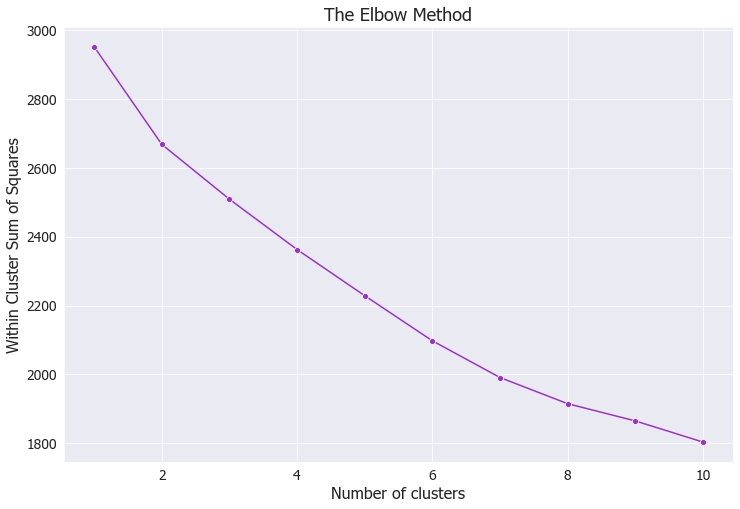

In [311]:
import seaborn as sns
plt.figure(figsize = (12, 8))
sns.lineplot(range(1, 11), wcss, marker = 'o', color = 'darkorchid')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('The Elbow Method', fontsize = 18)
plt.xlabel('Number of clusters', fontsize = 16)
plt.ylabel('Within Cluster Sum of Squares', fontsize = 16)

plt.show()

### 5.2. Agglomerative Clustering

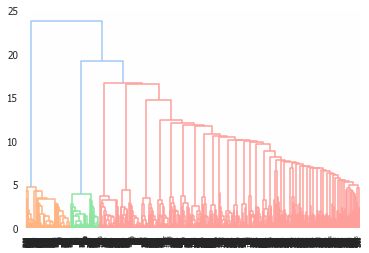

In [312]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(data_final))
plt.show()

### 5.3. DBSCAN

In [379]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps = 1.4,min_samples = 80)
pred_y = dbs.fit(data_final)

In [382]:
list(pred_y.labels_).count(0)

151

<b> Important Note: </b> As you see above, I coulnt fit any of clustering algorithemes on data. As you see we cant estimte number of clusters in Kmeans and Agglomerative method. Aslo in dbscan it doenst work and allocate very few number of samples to each cluster and identify most of samples as outlier. (I tested with different values of eps and min_sample). I Also tried to fit algorithemes to data without NLP and removed vetorized texts, but I got the same resualt.

So because have no idea to what to do next, I should stop this notebook here. Ple let me know what my mistake was and why I couldnt fit any model on that. Tnx a lot.